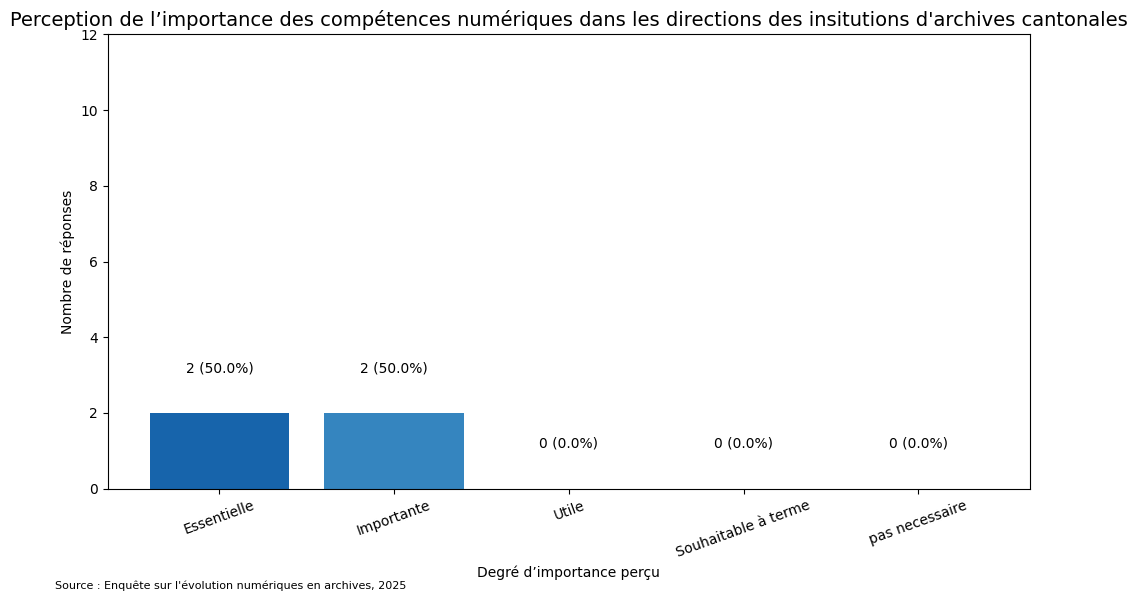

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Charger les données
file_path = "Evolutions numériques en archives_31 juillet 2025_20.57.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet0")

# Extraire et simplifier les réponses
col = "Selon vous, dans quelle mesure la maîtrise des technologies numériques est-elle devenue indispensable dans le métier d'archiviste ?"
mapping = {
    "Essentielle : sans compétences numériques solides, il est aujourd’hui difficile d’exercer correctement le métier.": "Essentielle",
    "Importante : elle est nécessaire dans de nombreux aspects, mais pas indispensable pour toutes les missions.": "Importante"
}
ordre = ["Essentielle", "Importante", "Utile", "Souhaitable à terme", "pas necessaire"]
df_simplifie = df[col].map(mapping)

# Comptage et pourcentage
counts = df_simplifie.value_counts().reindex(ordre, fill_value=0)
pourcentages = (counts / counts.sum() * 100).round(1)

# Couleurs : dégradé de bleu du plus foncé (Essentielle) au plus clair
colors = [mcolors.to_hex(c) for c in plt.cm.Blues(np.linspace(0.8, 0.3, len(ordre)))]

# Tracer le graphique
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(counts.index, counts.values, color=colors)

# Étiquettes (valeurs + %)
for bar, pct in zip(bars, pourcentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height} ({pct}%)",
            ha='center', va='bottom', fontsize=10)

# Mise en forme
ax.set_title("Perception de l’importance des compétences numériques dans les directions des insitutions d'archives cantonales", fontsize=14)
ax.set_ylabel("Nombre de réponses")
ax.set_xlabel("Degré d’importance perçu")
ax.set_ylim(0, max(counts.values) + 10)
plt.xticks(rotation=20)
plt.figtext(0.01, 0.01, "Source : Enquête sur l'évolution numériques en archives, 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()


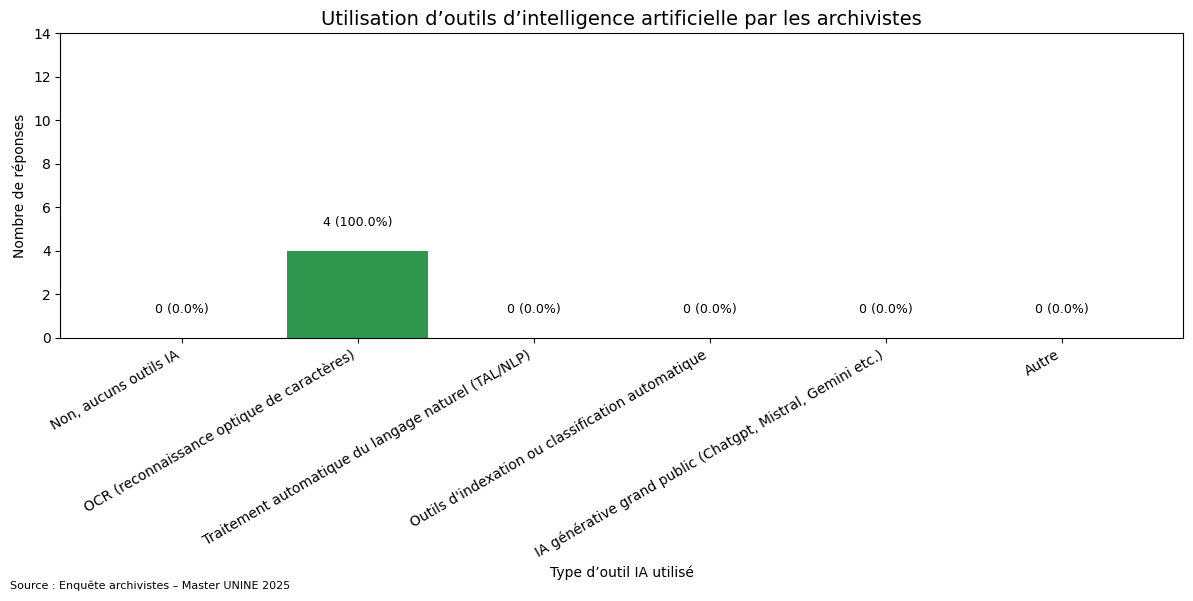

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Charger les données
file_path = "Evolutions numériques en archives_31 juillet 2025_20.57.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet0")

# Extraire et nettoyer la colonne avec plusieurs réponses possibles
col_ia = "Utilisez-vous régulièrement des outils issus de méthode d’intelligence artificielle ? (plusieurs réponses possibles) - Selected Choice"
df_ia = df[col_ia].dropna()

# Séparer les réponses multiples, les nettoyer
reponses_explosees = df_ia.str.split(",").explode().str.strip()

# Définir les modalités d’intérêt dans l’ordre souhaité
modalites_ia = [
    "Non, aucuns outils IA",
    "OCR (reconnaissance optique de caractères)",
    "Traitement automatique du langage naturel (TAL/NLP)",
    "Outils d'indexation ou classification automatique",
    "IA générative grand public (Chatgpt, Mistral, Gemini etc.)",
    "Autre"
]

# Compter les occurrences en respectant l’ordre défini
ia_counts = reponses_explosees.value_counts().reindex(modalites_ia, fill_value=0)
ia_pourcentages = (ia_counts / ia_counts.sum() * 100).round(1)

# Générer un dégradé de vert du plus foncé au plus clair
colors = [mcolors.to_hex(c) for c in plt.cm.Greens(np.linspace(0.8, 0.3, len(modalites_ia)))]

# Créer le barplot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(ia_counts.index, ia_counts.values, color=colors)

# Ajouter les étiquettes (valeur et pourcentage)
for bar, pct in zip(bars, ia_pourcentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height} ({pct}%)",
            ha='center', va='bottom', fontsize=9)

# Mise en forme du graphique
ax.set_title("Utilisation d’outils d’intelligence artificielle par les archivistes", fontsize=14)
ax.set_ylabel("Nombre de réponses")
ax.set_xlabel("Type d’outil IA utilisé")
ax.set_ylim(0, max(ia_counts.values) + 10)
plt.xticks(rotation=30, ha="right")

# Source en bas à gauche
plt.figtext(0.01, 0.01, "Source : Enquête archivistes – Master UNINE 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()


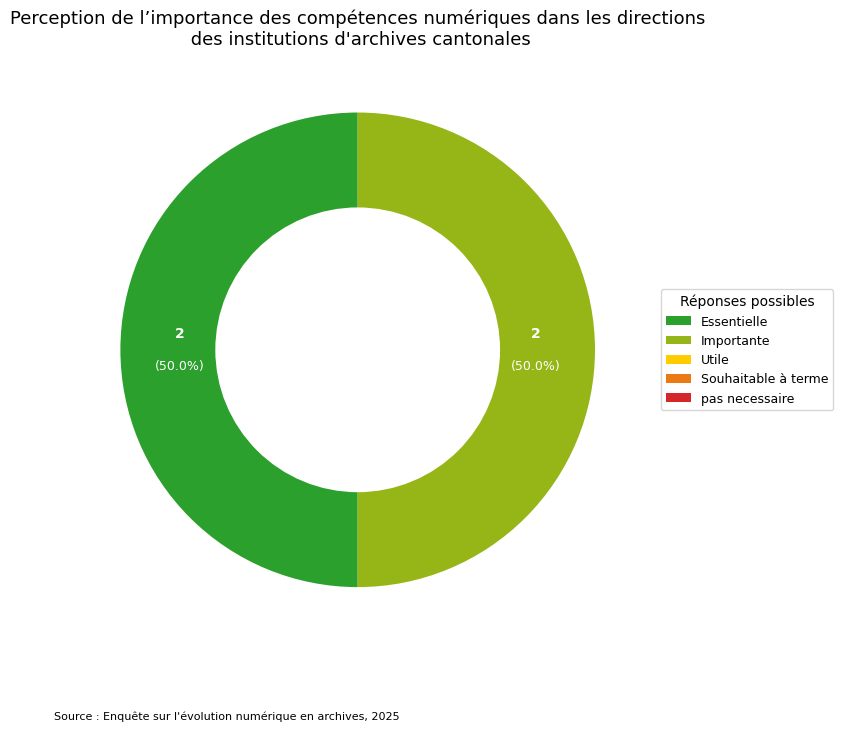

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Charger les données
file_path = "Evolutions numériques en archives_31 juillet 2025_20.57.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet0")

# Préparer la colonne cible
col = "Selon vous, dans quelle mesure la maîtrise des technologies numériques est-elle devenue indispensable dans le métier d'archiviste ?"
mapping = {
    "Essentielle : sans compétences numériques solides, il est aujourd’hui difficile d’exercer correctement le métier.": "Essentielle",
    "Importante : elle est nécessaire dans de nombreux aspects, mais pas indispensable pour toutes les missions.": "Importante"
}
ordre = ["Essentielle", "Importante", "Utile", "Souhaitable à terme", "pas necessaire"]
df_simplifie = df[col].map(mapping)

# Compter les réponses
counts = df_simplifie.value_counts().reindex(ordre, fill_value=0)

# Palette Vert → Jaune → Rouge
cmap_custom = LinearSegmentedColormap.from_list("green_to_red", ["#2ca02c", "#ffcc00", "#d62728"], N=len(ordre))
colors_custom = [mcolors.to_hex(cmap_custom(i / (len(ordre) - 1))) for i in range(len(ordre))]

# Données présentes pour affichage
counts_present = counts[counts > 0]
colors_present = [color for c, color in zip(counts, colors_custom) if c > 0]

# Tracer le donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    counts_present,
    labels=None,
    colors=colors_present,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Ajouter les étiquettes : nombre + pourcentage, plus éloignés du centre
total = counts.sum()
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    radius = 0.75  # éloignement du centre
    x = np.cos(np.deg2rad(angle)) * radius
    y = np.sin(np.deg2rad(angle)) * radius
    valeur = counts_present.iloc[i]
    pct = valeur / total * 100

    ax.text(x, y + 0.04, f"{valeur}", ha='center', va='bottom', color='white', fontsize=10, weight='bold')
    ax.text(x, y - 0.04, f"({pct:.1f}%)", ha='center', va='top', color='white', fontsize=9)

# Légende complète avec toutes les modalités (même absentes)
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors_custom, ordre)]
ax.legend(handles=legend_elements, title="Réponses possibles", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

# Titre et source
ax.set_title("Perception de l’importance des compétences numériques dans les directions\n des institutions d'archives cantonales", fontsize=13)
plt.figtext(0.01, 0.01, "Source : Enquête sur l'évolution numérique en archives, 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()



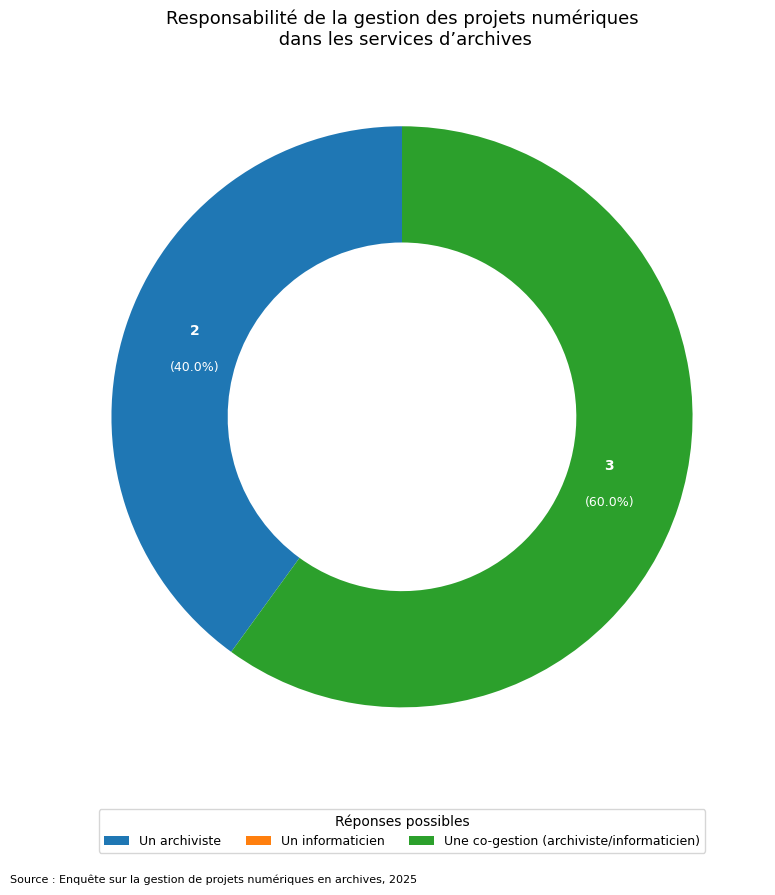

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import numpy as np

# Charger les données
file_path = "Gestion_projet_archives.xlsx"  # Adapte le chemin si nécessaire
df = pd.read_excel(file_path, sheet_name="Feuil1")

# Nom de la colonne cible
col = "Dans votre service d’archives, la gestion des projets numériques est de la responsabilité de quel profil professionnel ?"
df[col] = df[col].str.strip()  # Nettoyage des espaces

# Ordre des modalités attendues
ordre = [
    "Un archiviste",
    "Un informaticien",
    "Une co-gestion (archiviste/informaticien)"
    
]

# Comptage des réponses
counts = df[col].value_counts().reindex(ordre, fill_value=0)
counts_present = counts[counts > 0]

# Palette de couleurs variées
palette_diverse = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
colors_present = [color for c, color in zip(counts, palette_diverse) if c > 0]

# Tracer le donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(
    counts_present,
    labels=None,
    colors=colors_present,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Ajouter les étiquettes (valeurs + pourcentages)
total = counts.sum()
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    radius = 0.75
    x = np.cos(np.deg2rad(angle)) * radius
    y = np.sin(np.deg2rad(angle)) * radius
    valeur = counts_present.iloc[i]
    pct = valeur / total * 100

    ax.text(x, y + 0.04, f"{valeur}", ha='center', va='bottom', color='white', fontsize=10, weight='bold')
    ax.text(x, y - 0.04, f"({pct:.1f}%)", ha='center', va='top', color='white', fontsize=9)

# Légende sous le donut
fig.legend(
    handles=[Patch(facecolor=color, label=label) for color, label in zip(palette_diverse, ordre)],
    title="Réponses possibles",
    loc="lower center",
    ncol=3,
    fontsize=9,
    bbox_to_anchor=(0.5, -0.08)
)

# Titre et source bien séparée
ax.set_title("Responsabilité de la gestion des projets numériques\n dans les services d’archives", fontsize=13)
plt.figtext(0.01, -0.11, "Source : Enquête sur la gestion de projets numériques en archives, 2025", ha="left", fontsize=8)

plt.tight_layout()
plt.show()
